# Docentes Analysis

## Importando

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
sns.set_palette("Dark2")

In [3]:
uri = 'https://github.com/mauricioarauujo/capes-data-analysis/blob/develop/data/Docentes_2013-2019.parquet?raw=true'

In [4]:
docentes_df = pd.read_parquet(uri)

## Conhecendo e tratando as variáveis

In [5]:
docentes_df.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,DS_DEPENDENCIA_ADMINISTRATIVA,CS_STATUS_JURIDICO,NM_MUNICIPIO_PROGRAMA_IES,SG_UF_PROGRAMA,NM_REGIAO,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_TIPO_NACIONALIDADE_DOCENTE,NM_PAIS_NACIONALIDADE_DOCENTE,DS_CATEGORIA_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,NM_AREA_BASICA_TITULACAO,SG_IES_TITULACAO,NM_PAIS_IES_TITULACAO
0,2019,49,MULTIDISCIPLINAR,CIÊNCIAS AMBIENTAIS,10001018017P9,MESTRADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,ROLIM DE MOURA,RO,NORTE,FEMININO,1968,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2004.0,DOUTORADO,RECURSOS FLORESTAIS E ENGENHARIA FLORESTAL,UFSM,BRASIL
1,2019,38,CIÊNCIAS HUMANAS,EDUCAÇÃO,10001018016P2,MESTRADO PROFISSIONAL,PROFISSIONAL,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1963,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2012.0,DOUTORADO,EDUCAÇÃO,UERJ,BRASIL
2,2019,27,CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,53045009001P3,MESTRADO PROFISSIONAL,PROFISSIONAL,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,FEMININO,1972,BRASILEIRO,BRASIL,COLABORADOR,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2013.0,DOUTORADO,ADMINISTRAÇÃO,UFRGS,BRASIL
3,2019,45,MULTIDISCIPLINAR,INTERDISCIPLINAR,10001018004P4,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1978,BRASILEIRO,BRASIL,PERMANENTE,CLT,PARCIAL,S,2007.0,DOUTORADO,MELHORAMENTO VEGETAL,UFV,BRASIL
4,2019,7,CIÊNCIAS BIOLÓGICAS,ECOLOGIA,10001018041P7,MESTRADO,ACADÊMICO,A,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1976,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,PARCIAL,S,2004.0,DOUTORADO,BIOLOGIA GERAL,UNB,BRASIL


In [6]:
docentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662665 entries, 0 to 662664
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AN_BASE                        662665 non-null  int64  
 1   CD_AREA_AVALIACAO              662665 non-null  int64  
 2   NM_GRANDE_AREA_CONHECIMENTO    662665 non-null  object 
 3   NM_AREA_CONHECIMENTO           662665 non-null  object 
 4   CD_PROGRAMA_IES                662665 non-null  object 
 5   NM_GRAU_PROGRAMA               662665 non-null  object 
 6   NM_MODALIDADE_PROGRAMA         662665 non-null  object 
 7   CD_CONCEITO_PROGRAMA           662665 non-null  object 
 8   SG_ENTIDADE_ENSINO             662665 non-null  object 
 9   NM_ENTIDADE_ENSINO             662665 non-null  object 
 10  DS_DEPENDENCIA_ADMINISTRATIVA  662665 non-null  object 
 11  CS_STATUS_JURIDICO             662665 non-null  object 
 12  NM_MUNICIPIO_PROGRAMA_IES     

In [7]:
docentes_df['CD_CONCEITO_PROGRAMA'].unique()

array(['3', '4', 'A', '5', '2', '1', '6', '7'], dtype=object)

In [8]:
docentes_df['NM_GRAU_TITULACAO'].unique()

array(['DOUTORADO', 'MESTRADO PROFISSIONAL', 'MESTRADO', 'BACHARELADO',
       'GRADUAÇÃO', None], dtype=object)

### Removendo conceitos 'A's 

In [9]:
docentes_df = docentes_df[docentes_df['CD_CONCEITO_PROGRAMA'] != 'A'].copy()

In [10]:
docentes_df['CD_CONCEITO_PROGRAMA'] = docentes_df['CD_CONCEITO_PROGRAMA'].astype(int)  

In [11]:
docentes_df.CD_PROGRAMA_IES.value_counts()

31075010001P2    7924
33283010001P5    3869
23001011069P5    3823
22003010017P5    1669
31001017155P1    1616
                 ... 
40020010005P2       9
28013018002P6       8
52001016017P7       8
52001016035P5       4
31005012022P7       1
Name: CD_PROGRAMA_IES, Length: 4466, dtype: int64

<AxesSubplot:xlabel='AN_BASE', ylabel='count'>

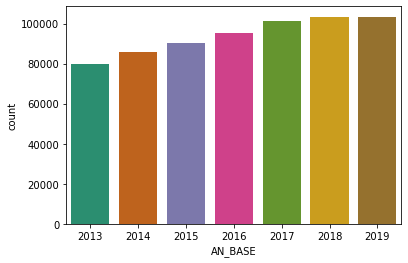

In [12]:
sns.countplot(data = docentes_df, x = 'AN_BASE')

## Explorando as áreas de conhecimentos

In [13]:
docentes_df['NM_GRANDE_AREA_CONHECIMENTO'].unique()

array(['MULTIDISCIPLINAR', 'CIÊNCIAS HUMANAS',
       'CIÊNCIAS SOCIAIS APLICADAS', 'CIÊNCIAS EXATAS E DA TERRA',
       'LINGÜÍSTICA, LETRAS E ARTES', 'CIÊNCIAS BIOLÓGICAS',
       'CIÊNCIAS DA SAÚDE', 'CIÊNCIAS AGRÁRIAS', 'ENGENHARIAS'],
      dtype=object)

(0.0, 25000.0)

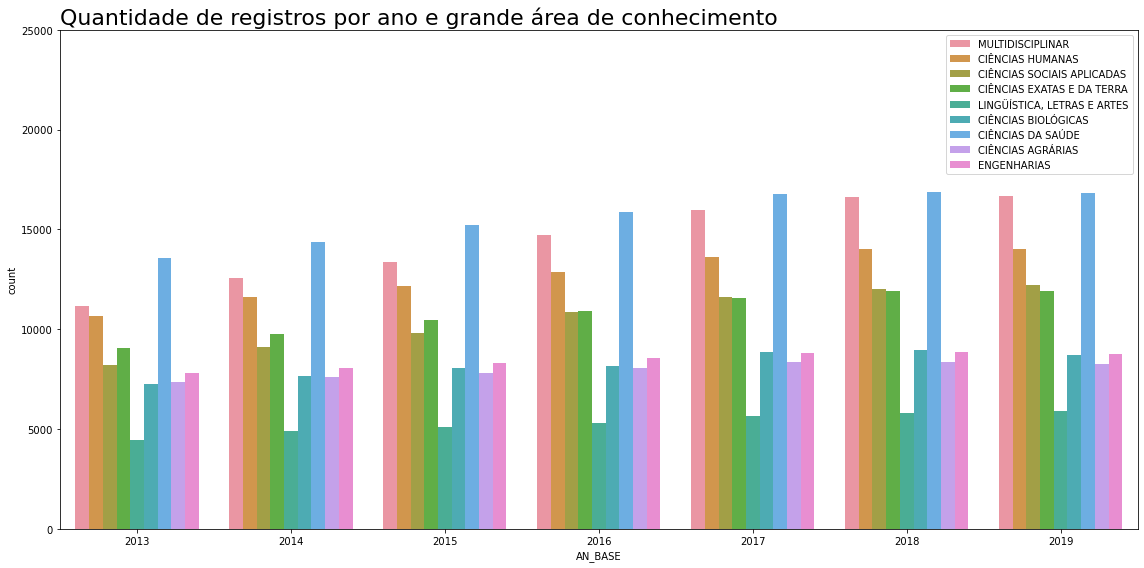

In [14]:
plt.figure(figsize = (16,8), tight_layout = True)
sns.countplot(data = docentes_df, x = 'AN_BASE', hue = 'NM_GRANDE_AREA_CONHECIMENTO')
plt.legend(loc = 'upper right')
plt.title('Quantidade de registros por ano e grande área de conhecimento', fontdict= {'fontsize': 22}, loc = 'left')
plt.ylim((0,25000))

In [15]:
docentes_df.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,DS_DEPENDENCIA_ADMINISTRATIVA,CS_STATUS_JURIDICO,NM_MUNICIPIO_PROGRAMA_IES,SG_UF_PROGRAMA,NM_REGIAO,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_TIPO_NACIONALIDADE_DOCENTE,NM_PAIS_NACIONALIDADE_DOCENTE,DS_CATEGORIA_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,NM_AREA_BASICA_TITULACAO,SG_IES_TITULACAO,NM_PAIS_IES_TITULACAO
0,2019,49,MULTIDISCIPLINAR,CIÊNCIAS AMBIENTAIS,10001018017P9,MESTRADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,ROLIM DE MOURA,RO,NORTE,FEMININO,1968,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2004.0,DOUTORADO,RECURSOS FLORESTAIS E ENGENHARIA FLORESTAL,UFSM,BRASIL
1,2019,38,CIÊNCIAS HUMANAS,EDUCAÇÃO,10001018016P2,MESTRADO PROFISSIONAL,PROFISSIONAL,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1963,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2012.0,DOUTORADO,EDUCAÇÃO,UERJ,BRASIL
2,2019,27,CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,53045009001P3,MESTRADO PROFISSIONAL,PROFISSIONAL,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,FEMININO,1972,BRASILEIRO,BRASIL,COLABORADOR,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2013.0,DOUTORADO,ADMINISTRAÇÃO,UFRGS,BRASIL
3,2019,45,MULTIDISCIPLINAR,INTERDISCIPLINAR,10001018004P4,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1978,BRASILEIRO,BRASIL,PERMANENTE,CLT,PARCIAL,S,2007.0,DOUTORADO,MELHORAMENTO VEGETAL,UFV,BRASIL
5,2019,3,CIÊNCIAS EXATAS E DA TERRA,FÍSICA,33283010001P5,MESTRADO PROFISSIONAL,PROFISSIONAL,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1978,ESTRANGEIRO,LÍBANO,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2007.0,DOUTORADO,FÍSICA,UFG,BRASIL


In [16]:
docentes_ano_grande_area = docentes_df.groupby(['AN_BASE', 'NM_GRANDE_AREA_CONHECIMENTO']).mean().reset_index()

In [17]:
docentes_ano_grande_area.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,CD_AREA_AVALIACAO,CD_CONCEITO_PROGRAMA,AN_NASCIMENTO_DOCENTE,AN_TITULACAO
0,2013,CIÊNCIAS AGRÁRIAS,33.690793,4.352390,1965.025394,1999.853341
1,2013,CIÊNCIAS BIOLÓGICAS,7.269231,4.732010,1965.010615,1998.445685
2,2013,CIÊNCIAS DA SAÚDE,19.063673,4.466765,1963.158116,2000.285020
3,2013,CIÊNCIAS EXATAS E DA TERRA,2.837353,4.879419,1965.990420,1998.732188
4,2013,CIÊNCIAS HUMANAS,37.228494,4.335954,1961.129552,2000.480902


(0.0, 7.0)

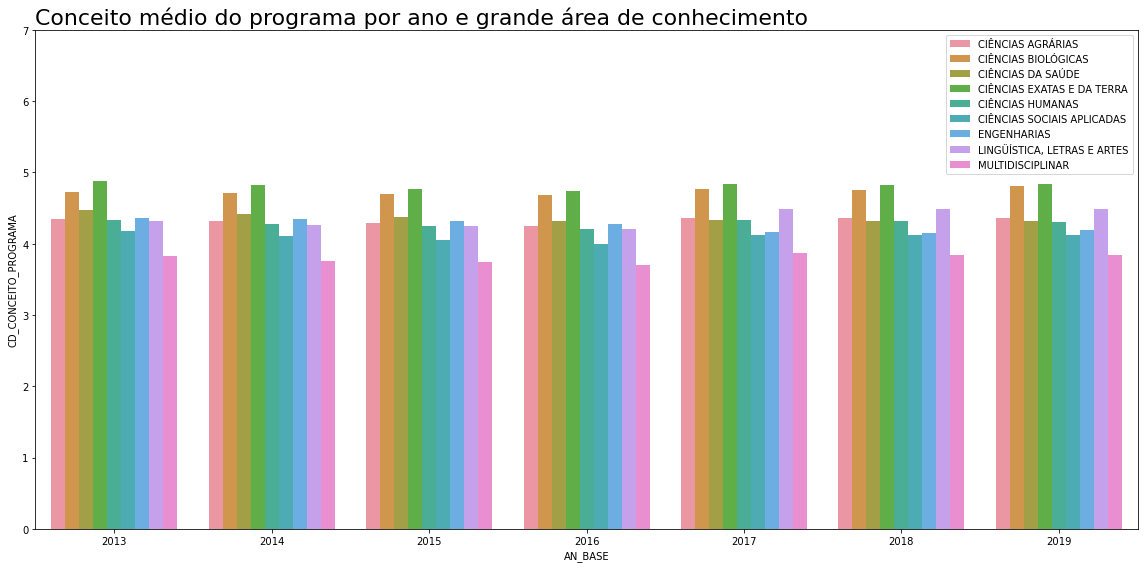

In [18]:
plt.figure(figsize = (16,8), tight_layout = True)
sns.barplot(data = docentes_ano_grande_area, x = 'AN_BASE', y = 'CD_CONCEITO_PROGRAMA', hue = 'NM_GRANDE_AREA_CONHECIMENTO')
plt.legend(loc = 'upper right')
plt.title('Conceito médio do programa por ano e grande área de conhecimento', fontdict= {'fontsize': 22}, loc = 'left')
plt.ylim((0,7))

Observação: Em todos os anos a proporção entre os conceitos médios das grandes áreas de conhecimento permanece inalterada 

In [19]:
docentes_df['NM_GRANDE_AREA_CONHECIMENTO'].unique()

array(['MULTIDISCIPLINAR', 'CIÊNCIAS HUMANAS',
       'CIÊNCIAS SOCIAIS APLICADAS', 'CIÊNCIAS EXATAS E DA TERRA',
       'LINGÜÍSTICA, LETRAS E ARTES', 'CIÊNCIAS BIOLÓGICAS',
       'CIÊNCIAS DA SAÚDE', 'CIÊNCIAS AGRÁRIAS', 'ENGENHARIAS'],
      dtype=object)

In [20]:
docentes_df['NM_GRANDE_AREA_CONHECIMENTO'] = docentes_df['NM_GRANDE_AREA_CONHECIMENTO'].map({
                                                'MULTIDISCIPLINAR': 'MULTIDISCIPLINAR',
                                                'CIÊNCIAS HUMANAS':'CIÊNCIAS HUMANAS',
                                                'CIÊNCIAS SOCIAIS APLICADAS': 'CIÊNCIAS SOCIAIS',
                                                'CIÊNCIAS EXATAS E DA TERRA': 'EXATAS',
                                                'LINGÜÍSTICA, LETRAS E ARTES': 'LETRAS',
                                                'CIÊNCIAS BIOLÓGICAS': 'BIOLÓGICAS',
                                                'CIÊNCIAS DA SAÚDE': 'SAÚDE',
                                                'CIÊNCIAS AGRÁRIAS': 'AGRÁRIAS',
                                                'ENGENHARIAS': 'ENGENHARIAS'},
                                              na_action = 'ignore')

Aqui foi remapeado os nomes da colunas para melhorar a visualização do gráfico de barras

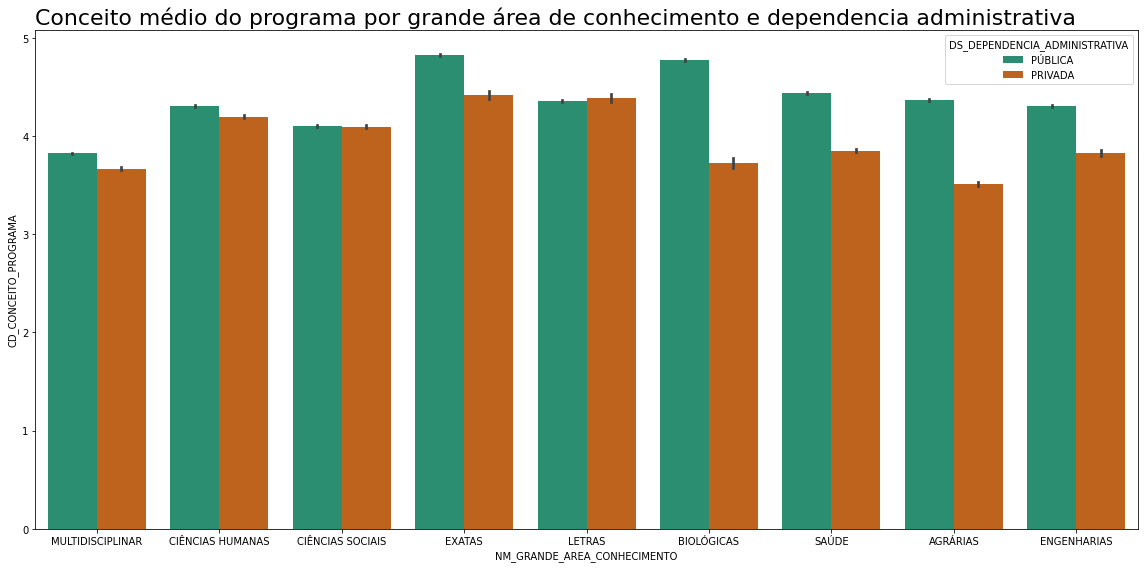

In [21]:
plt.figure(figsize = (16,8), tight_layout = True)
sns.barplot(data = docentes_df, x = 'NM_GRANDE_AREA_CONHECIMENTO', y = 'CD_CONCEITO_PROGRAMA', hue = 'DS_DEPENDENCIA_ADMINISTRATIVA')
plt.title('Conceito médio do programa por grande área de conhecimento e dependencia administrativa', fontdict= {'fontsize': 22}, loc = 'left')
plt.tight_layout()

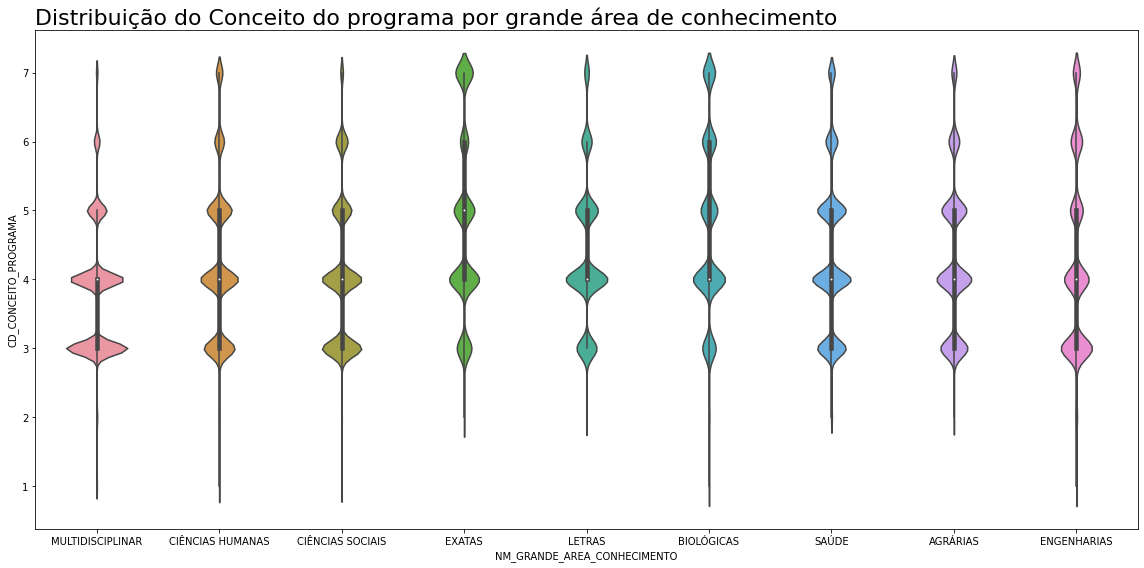

In [22]:
plt.figure(figsize = (16,8), tight_layout = True)
sns.violinplot(data = docentes_df, x = 'NM_GRANDE_AREA_CONHECIMENTO', y = 'CD_CONCEITO_PROGRAMA',  width=0.5, whis = 1)
#plt.legend(loc = 'upper right')
plt.title('Distribuição do Conceito do programa por grande área de conhecimento', fontdict= {'fontsize': 22}, loc = 'left')
plt.tight_layout()

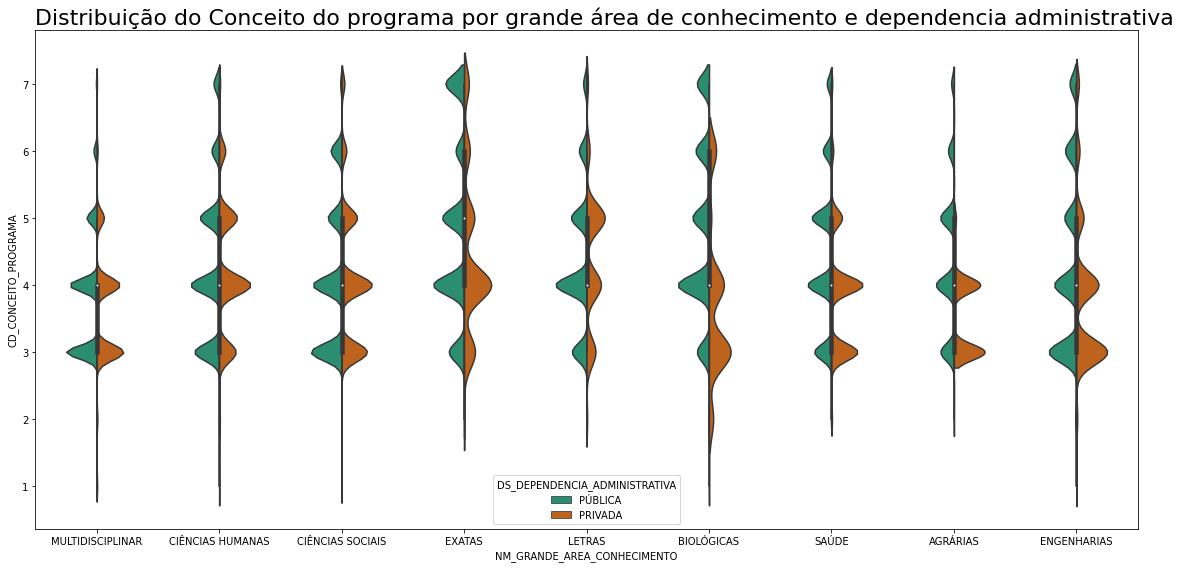

In [23]:
plt.figure(figsize = (16,8), tight_layout = True)
sns.violinplot(data = docentes_df, x = 'NM_GRANDE_AREA_CONHECIMENTO', y = 'CD_CONCEITO_PROGRAMA', hue = 'DS_DEPENDENCIA_ADMINISTRATIVA', split = True, width=0.5, whis = 1)
#plt.legend(loc = 'upper right')
plt.title('Distribuição do Conceito do programa por grande área de conhecimento e dependencia administrativa', fontdict= {'fontsize': 22}, loc = 'left')
plt.tight_layout()

Observação: Podemos ver que programas de exatas tem uma concentração maior de conceitos "7" por conta de dependências administrativas públicas. Enquanto isso programas multidisciplinares e de engenharia tem maior concentração de conceitos "3" tanto por dependências públicas quanto privada.

In [40]:
grau_por_area_df = docentes_df.groupby(['NM_GRANDE_AREA_CONHECIMENTO'])['NM_GRAU_PROGRAMA'].value_counts().unstack().reset_index()

In [41]:
docentes_df['NM_GRAU_PROGRAMA'].unique()

array(['MESTRADO', 'MESTRADO PROFISSIONAL', 'MESTRADO/DOUTORADO',
       'DOUTORADO', 'DOUTORADO PROFISSIONAL'], dtype=object)

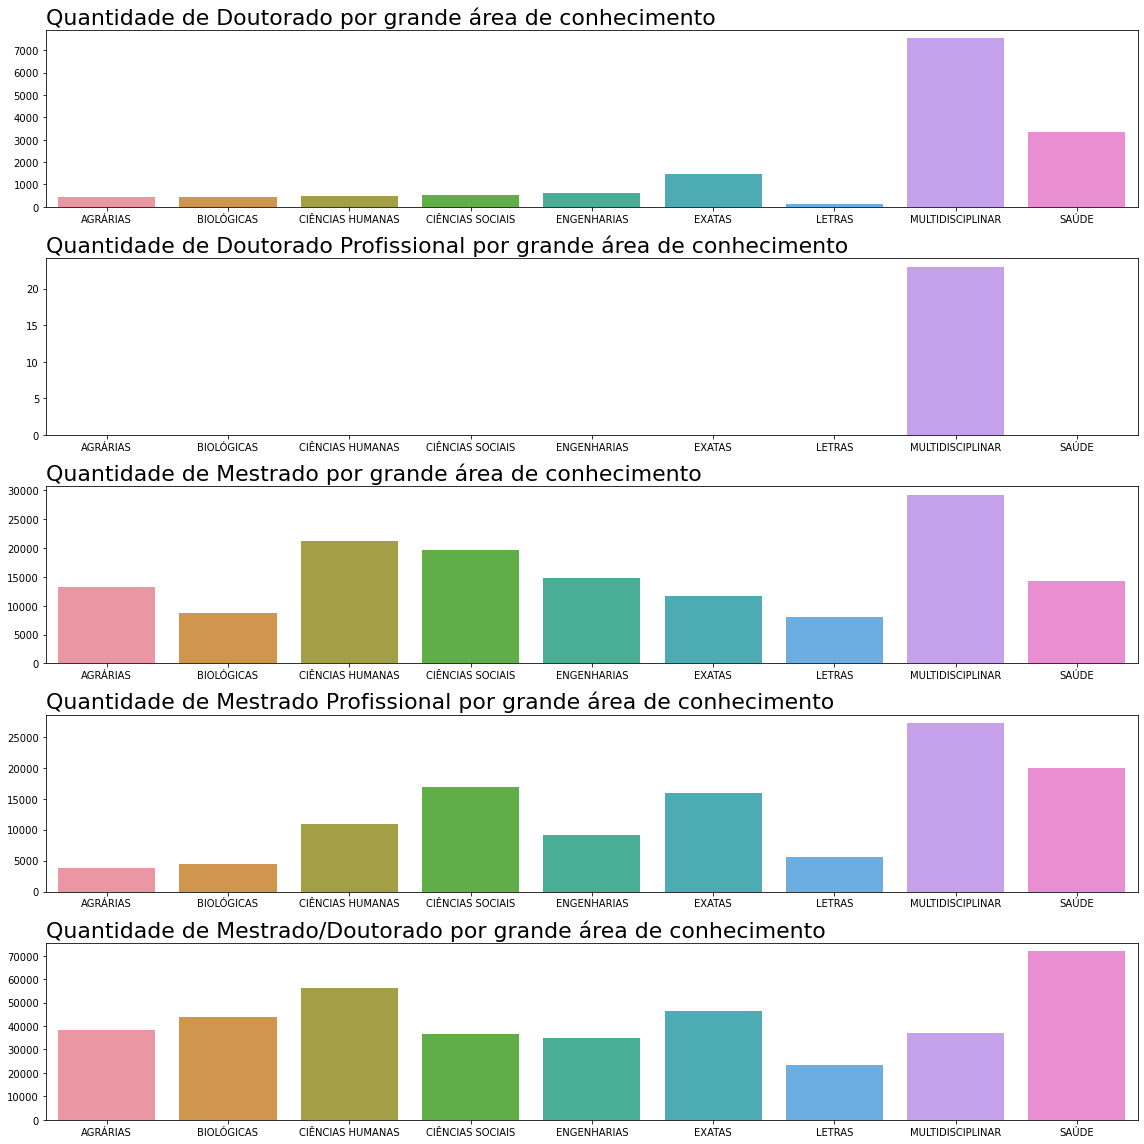

In [42]:
fig, axes = plt.subplots(5, 1, figsize=(16,16))
for i in range(1,len(grau_por_area_df.columns)):
    col = grau_por_area_df.columns[i]
    sns.barplot(data = grau_por_area_df, x = 'NM_GRANDE_AREA_CONHECIMENTO', y = col, ax= axes[i-1])
    axes[i-1].set_title(f'Quantidade de {col.title()} por grande área de conhecimento', fontdict= {'fontsize': 22}, loc = 'left')
    axes[i-1].set_xlabel('')
    axes[i-1].set_ylabel('')
    plt.tight_layout()

## Explorando IES

In [26]:
docentes_df.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,DS_DEPENDENCIA_ADMINISTRATIVA,CS_STATUS_JURIDICO,NM_MUNICIPIO_PROGRAMA_IES,SG_UF_PROGRAMA,NM_REGIAO,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_TIPO_NACIONALIDADE_DOCENTE,NM_PAIS_NACIONALIDADE_DOCENTE,DS_CATEGORIA_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,NM_AREA_BASICA_TITULACAO,SG_IES_TITULACAO,NM_PAIS_IES_TITULACAO
0,2019,49,MULTIDISCIPLINAR,CIÊNCIAS AMBIENTAIS,10001018017P9,MESTRADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,ROLIM DE MOURA,RO,NORTE,FEMININO,1968,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2004.0,DOUTORADO,RECURSOS FLORESTAIS E ENGENHARIA FLORESTAL,UFSM,BRASIL
1,2019,38,CIÊNCIAS HUMANAS,EDUCAÇÃO,10001018016P2,MESTRADO PROFISSIONAL,PROFISSIONAL,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1963,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2012.0,DOUTORADO,EDUCAÇÃO,UERJ,BRASIL
2,2019,27,CIÊNCIAS SOCIAIS,ADMINISTRAÇÃO,53045009001P3,MESTRADO PROFISSIONAL,PROFISSIONAL,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,FEMININO,1972,BRASILEIRO,BRASIL,COLABORADOR,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2013.0,DOUTORADO,ADMINISTRAÇÃO,UFRGS,BRASIL
3,2019,45,MULTIDISCIPLINAR,INTERDISCIPLINAR,10001018004P4,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1978,BRASILEIRO,BRASIL,PERMANENTE,CLT,PARCIAL,S,2007.0,DOUTORADO,MELHORAMENTO VEGETAL,UFV,BRASIL
5,2019,3,EXATAS,FÍSICA,33283010001P5,MESTRADO PROFISSIONAL,PROFISSIONAL,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1978,ESTRANGEIRO,LÍBANO,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2007.0,DOUTORADO,FÍSICA,UFG,BRASIL


In [27]:
docentes_df['SG_IES_TITULACAO'].nunique()

1447

In [28]:
docentes_df.groupby(['SG_IES_TITULACAO'])['CD_CONCEITO_PROGRAMA'].count().sort_values(ascending = False).head(10)

SG_IES_TITULACAO
USP        106207
UNICAMP     50161
UFRJ        43827
UFRGS       29588
UFMG        24082
UFSC        17825
PUC/SP      14918
UFPE        13951
UNIFESP     13582
USP/RP      13458
Name: CD_CONCEITO_PROGRAMA, dtype: int64

### Analisando as IES com mais aparições no dataset

In [29]:
IES_analisadas = docentes_df.groupby(['SG_IES_TITULACAO'])['CD_CONCEITO_PROGRAMA'].count().sort_values(ascending = False).head(10).index

In [30]:
conceito_por_ies_df = docentes_df[docentes_df['SG_IES_TITULACAO'].isin(IES_analisadas)].groupby(['AN_BASE','SG_IES_TITULACAO'])['CD_CONCEITO_PROGRAMA'].mean().reset_index().sort_values(by = 'CD_CONCEITO_PROGRAMA', ascending = False)

In [31]:
conceito_por_ies_df.head()

,AN_BASE,SG_IES_TITULACAO,CD_CONCEITO_PROGRAMA
9,2013,USP/RP,4.622618
7,2013,UNIFESP,4.606908
17,2014,UNIFESP,4.583158
8,2013,USP,4.566019
19,2014,USP/RP,4.554930


(2013.0, 2020.0)

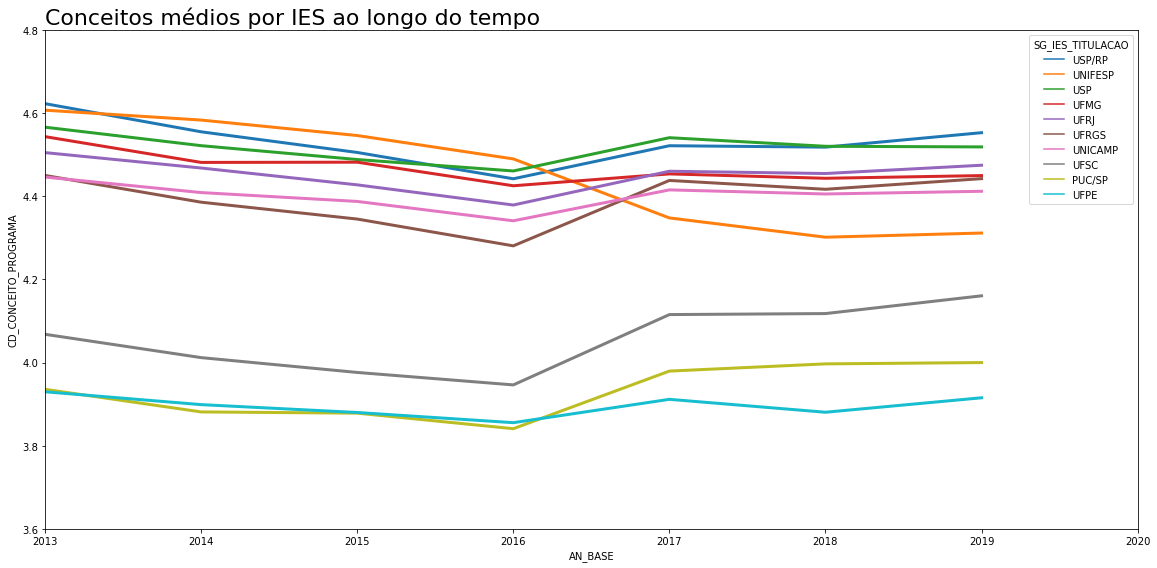

In [32]:
plt.figure(figsize=(16,8))
sns.lineplot(data = conceito_por_ies_df, x = 'AN_BASE', y = 'CD_CONCEITO_PROGRAMA', hue = 'SG_IES_TITULACAO', palette = 'tab10', lw = 3)
plt.title('Conceitos médios por IES ao longo do tempo', fontdict={'fontsize': 22}, loc = 'left')
plt.tight_layout()
plt.ylim((3.6,4.8))
plt.xlim((2013,2020))

In [33]:
docentes_df.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,DS_DEPENDENCIA_ADMINISTRATIVA,CS_STATUS_JURIDICO,NM_MUNICIPIO_PROGRAMA_IES,SG_UF_PROGRAMA,NM_REGIAO,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_TIPO_NACIONALIDADE_DOCENTE,NM_PAIS_NACIONALIDADE_DOCENTE,DS_CATEGORIA_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,NM_AREA_BASICA_TITULACAO,SG_IES_TITULACAO,NM_PAIS_IES_TITULACAO
0,2019,49,MULTIDISCIPLINAR,CIÊNCIAS AMBIENTAIS,10001018017P9,MESTRADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,ROLIM DE MOURA,RO,NORTE,FEMININO,1968,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2004.0,DOUTORADO,RECURSOS FLORESTAIS E ENGENHARIA FLORESTAL,UFSM,BRASIL
1,2019,38,CIÊNCIAS HUMANAS,EDUCAÇÃO,10001018016P2,MESTRADO PROFISSIONAL,PROFISSIONAL,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1963,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2012.0,DOUTORADO,EDUCAÇÃO,UERJ,BRASIL
2,2019,27,CIÊNCIAS SOCIAIS,ADMINISTRAÇÃO,53045009001P3,MESTRADO PROFISSIONAL,PROFISSIONAL,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,FEMININO,1972,BRASILEIRO,BRASIL,COLABORADOR,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2013.0,DOUTORADO,ADMINISTRAÇÃO,UFRGS,BRASIL
3,2019,45,MULTIDISCIPLINAR,INTERDISCIPLINAR,10001018004P4,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1978,BRASILEIRO,BRASIL,PERMANENTE,CLT,PARCIAL,S,2007.0,DOUTORADO,MELHORAMENTO VEGETAL,UFV,BRASIL
5,2019,3,EXATAS,FÍSICA,33283010001P5,MESTRADO PROFISSIONAL,PROFISSIONAL,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,MASCULINO,1978,ESTRANGEIRO,LÍBANO,PERMANENTE,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,S,2007.0,DOUTORADO,FÍSICA,UFG,BRASIL


In [34]:
conceitos_ies_df = docentes_df.groupby(['AN_BASE','SG_IES_TITULACAO'])['CD_CONCEITO_PROGRAMA'].mean().to_frame().reset_index()
conceitos_ies_df.head()

,AN_BASE,SG_IES_TITULACAO,CD_CONCEITO_PROGRAMA
0,2013,AA,4.166667
1,2013,AAU,5.250000
2,2013,ACTA,4.000000
3,2013,AGROPARISTECH,4.000000
4,2013,ALLIANT,4.000000


In [36]:
docentes_df.groupby(['NM_GRAU_PROGRAMA'])['CD_CONCEITO_PROGRAMA'].max()

NM_GRAU_PROGRAMA
DOUTORADO                 7
DOUTORADO PROFISSIONAL    4
MESTRADO                  5
MESTRADO PROFISSIONAL     5
MESTRADO/DOUTORADO        7
Name: CD_CONCEITO_PROGRAMA, dtype: int32

Podemos observar que o conceito máximo varia para diferentes graus de programa.